# Segmentation

In [2]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
from spectral import imshow
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import sys
sys.path.append("../")
from helpers.utils import load_image, tif_to_rgb
from config import COLOURS

In [4]:
im = load_image('train_1.tif')
im_rgb = tif_to_rgb(im)

In [15]:
# calculate segment sizes for given number of pixels sizes
im_size = np.shape(im_rgb)[0:2]
n_image_pixels = (im_size[0] * im_size[1])
pixels_dim = [10, 25, 50] # 5x5, 10x10 pixels...
n_segments_all = {}
for dim in pixels_dim:
    n_segment_pixels = dim*dim
    n_segments = n_image_pixels / n_segment_pixels
    n_segments_all[dim] = (np.floor(n_segments)).astype(int)

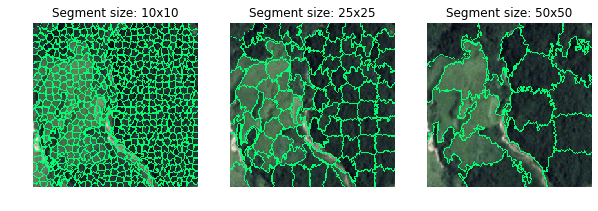

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)

for i, d in enumerate(n_segments_all.keys()):
    segments = slic(im_rgb, n_segments=n_segments_all[d])
    ax[i].imshow(mark_boundaries(im_rgb, segments, color=COLOURS['green']))
    ax[i].set_title(f"Segment size: {d}x{d}")

for a in ax.ravel():
    a.set_axis_off()

# plt.tight_layout()
plt.show()